In [ ]:
# !pip3 install tensorflow
# !pip3 install keras

In [19]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot as plt
import numpy as np
from numpy import expand_dims

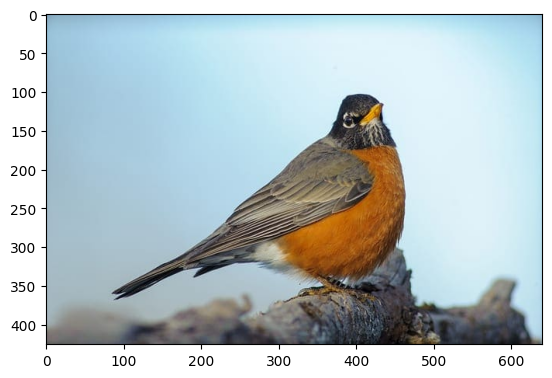

In [22]:
img = load_img('bird.jpg')
plt.imshow(img)

In [24]:
def visualize_vcg_layers(img):
    # load the model
    model = VGG16()
    # redefine model to output right after the first hidden layer
    ixs = [2, 5, 9, 13, 17]
    outputs = [model.layers[i].output for i in ixs]
    model = Model(inputs=model.inputs, outputs=outputs)
    # expand dimensions so that it represents a single 'sample'
    img = expand_dims(img, axis=0)
    # prepare the image (e.g. scale pixel values for the vgg)
    img = preprocess_input(img)
    # get feature map for first hidden layer
    feature_maps = model.predict(img)
    # plot the output from each block
    square = 8
    for fmap in feature_maps:
        # plot all 64 maps in an 8x8 squares
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
                ix += 1
        # show the figure
        plt.show()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_115']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


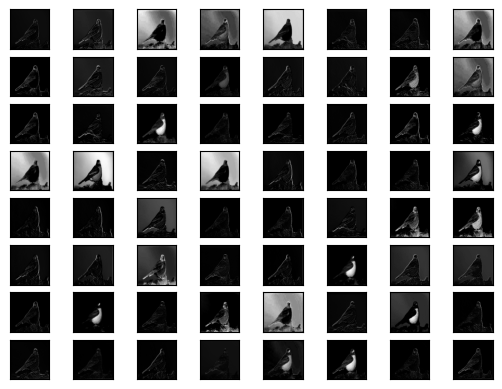

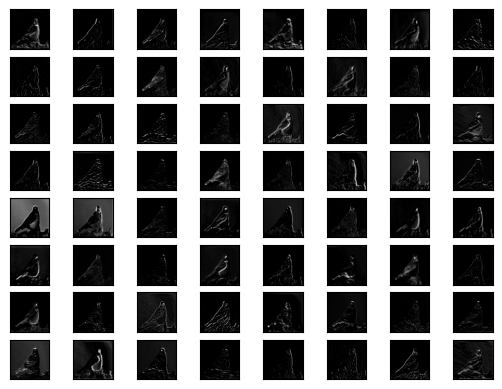

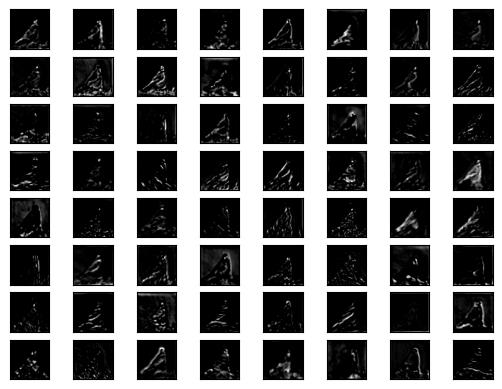

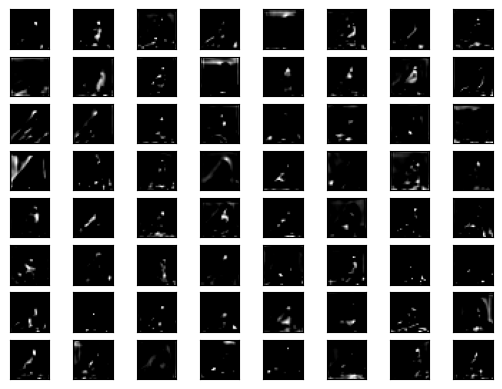

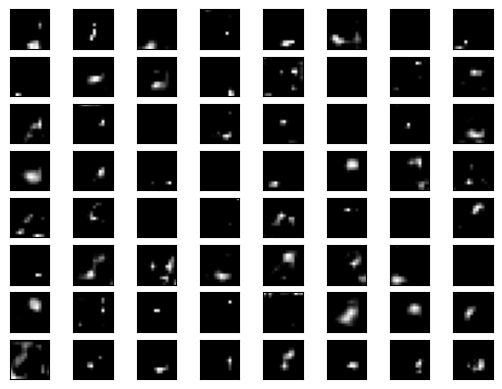

In [ ]:
img = load_img('imgs/bird.jpg', target_size=(224, 224))
img = img_to_array(img)
visualize_vcg_layers(img)

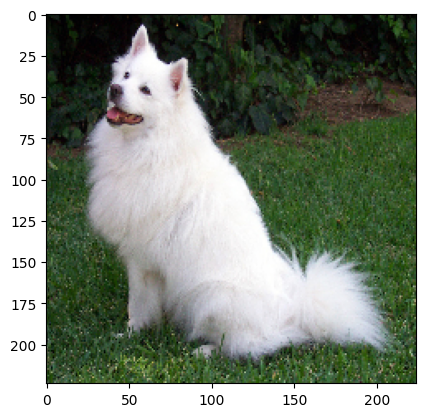

In [ ]:
img = load_img('imgs/dog.jpg', target_size=(224, 224))
plt.imshow(img)

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_184']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


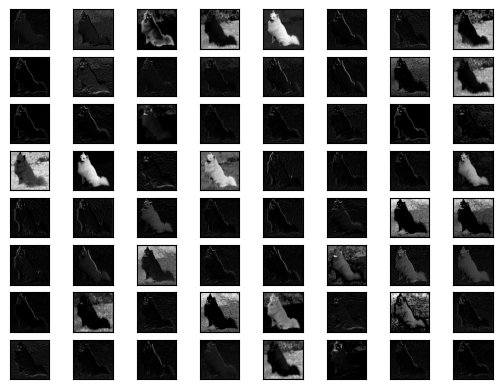

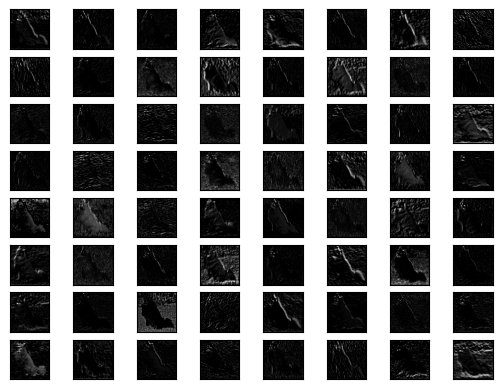

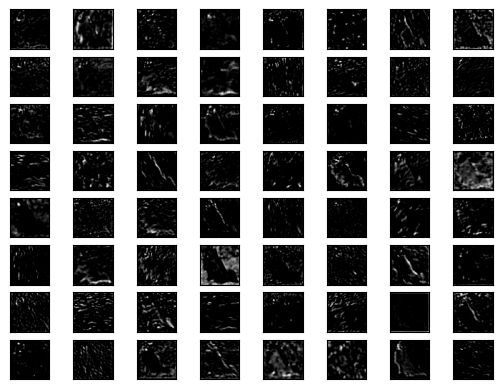

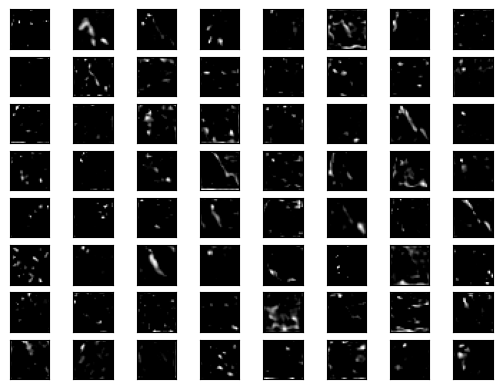

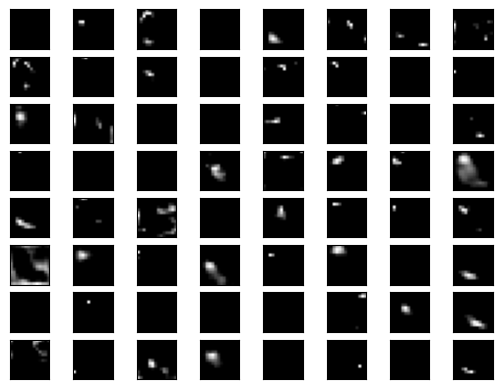

In [32]:
visualize_vcg_layers(img)

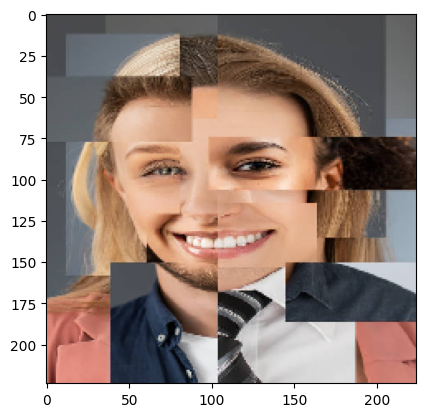

In [33]:
img = load_img('imgs/mosaic_face.jpg', target_size=(224, 224))
plt.imshow(img)

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_207']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


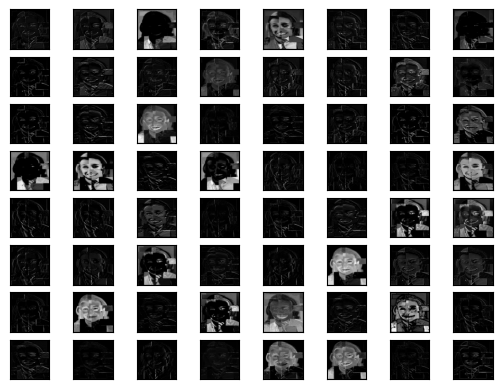

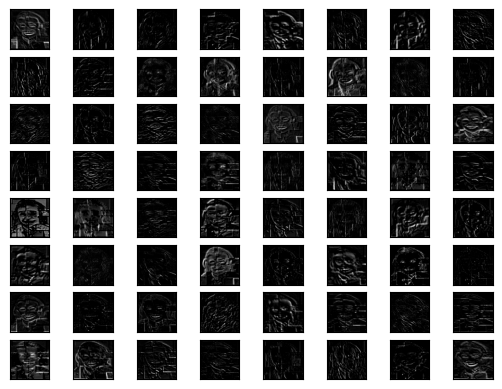

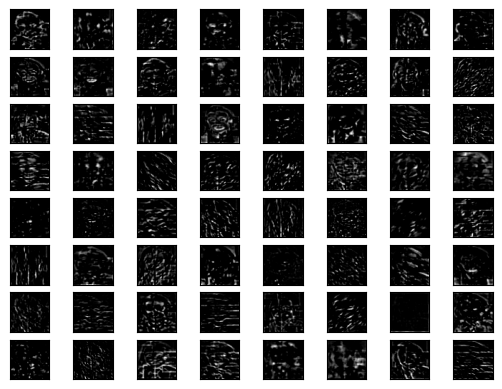

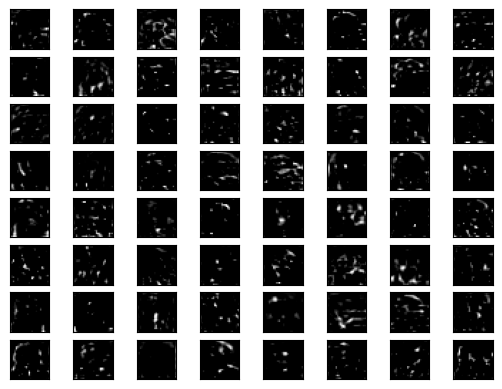

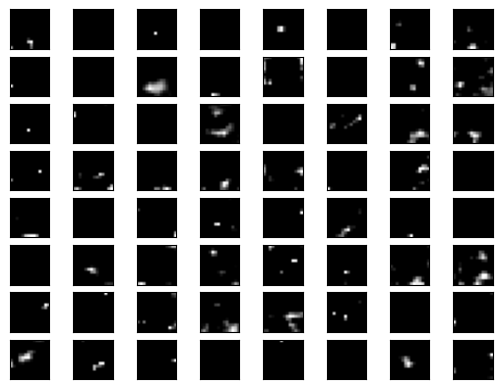

In [34]:
visualize_vcg_layers(img)

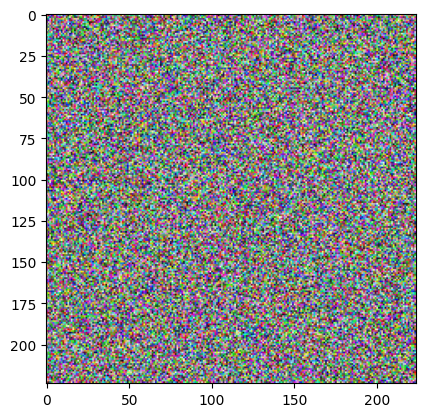

In [20]:
random_noise_image = np.random.rand(224, 224, 3)
plt.imshow(random_noise_image)

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_138']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


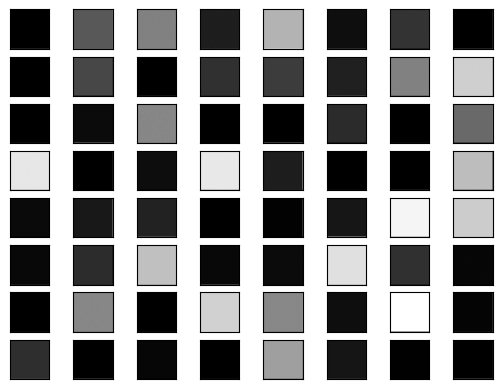

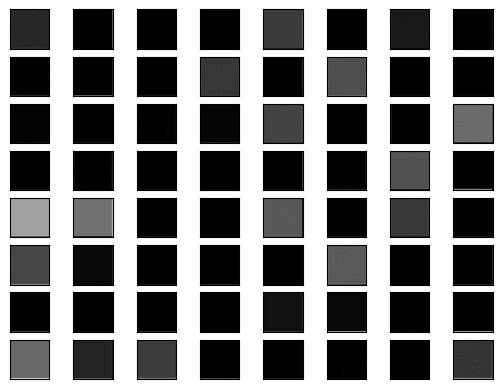

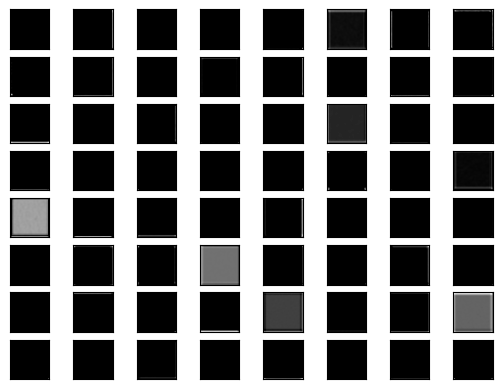

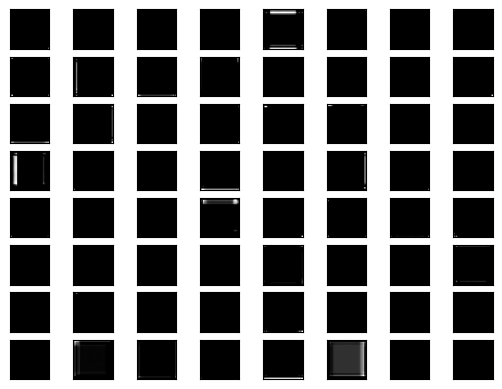

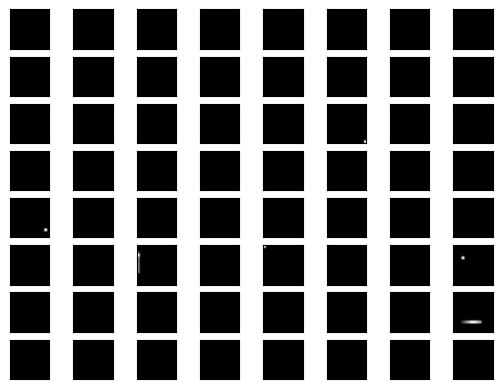

In [26]:
visualize_vcg_layers(random_noise_image)